## SVC Classifier
The model predicts the severity of the landslide (or if there will even be one) within the next 2 days, based on weather data from the past 5 days.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.utils import shuffle
import pickle

In [2]:
# df = pd.read_csv("full_dataset_v1.csv")
# df = pd.read_csv("/Users/ishaanjavali/Documents/Science Fair/2020/Code/API/full_dataset_v1.csv")
df = pd.read_csv("/Users/ishaanjavali/Documents/Science Fair/2020/Code/API/full_dataset_good.csv")
df.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,6,7,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(8953, 193)

In [3]:
df['severity'].value_counts()

na              4476
medium          3300
small            612
large            426
unknown           75
very_large        56
...                5
landslide          2
catastrophic       1
Name: severity, dtype: int64

In [4]:
# filter by severity. na is for non-landslide data
df = df[df['severity'].isin(["medium", "small", "large", "very_large", "na"])]
# Remove -1 slopes
df = df.loc[~(df.slope == -1)]

In [5]:
df['severity'].value_counts()
df = shuffle(df)
df.reset_index(inplace=True, drop=True)
print(len(df))

8696


In [6]:
def getX():
    X = df.copy()

    X.drop(X.columns[[i for i in range(0, 151)]], axis = 1, inplace = True)
    # X.drop(X.columns[[i for i in range(20, 35)]], axis = 1, inplace = True)
    X["severity"] = df["severity"]
    X.drop(X.columns[[0]], axis = 1, inplace = True)

    X = X.dropna()
    for i in range(0, 8):
        del X['air' + str(i)]
        del X['temp' + str(i)]
        del X['humidity' + str(i)]
        
    X.drop(X.columns[[i for i in range(len(X.columns)-8, len(X.columns)-2)]], axis = 1, inplace = True)
    return X
X = getX()
X

,precip7,wind7,precip6,wind6,precip5,wind5,precip4,wind4,precip3,wind3,slope,severity
0,0.9,7,5.7,6,7.3,8,1.4,5,2.4,7,50,medium
1,1.8,15,0.6,14,1.9,15,2.3,15,2.6,15,34,na
2,0.1,14,3.3,13,0.0,13,0.9,15,2.1,17,65,na
3,0.7,6,0.0,8,0.1,9,0.4,9,0.0,10,124,na
4,0.4,6,0.0,8,0.0,8,0.0,8,8.1,7,6,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
8691,0.0,5,0.0,4,0.0,3,0.0,5,0.0,8,37,medium
8692,3.9,4,4.3,4,5.2,5,3.4,4,3.2,4,65,medium
8693,16.2,18,0.5,9,1.0,10,0.0,10,0.0,9,98,na
8694,5.2,3,4.0,4,5.9,3,8.3,3,13.7,5,69,na


In [7]:
def generate_labels(binary = False):
    global X
    X = getX()
    y = []
    idx_to_severity = ["na", "small", "medium", "large", "very_large"]
    for severity in X.severity:
        if not binary:
            y.append(idx_to_severity.index(severity))
        elif severity == "na":
            y.append(0)
        else:
            y.append(1)
    X.drop(X.columns[[-1]], axis = 1, inplace = True)
    print(y.count(1))
    return y

In [8]:
binary = True
y = generate_labels(binary)

4311


In [9]:
X

,precip7,wind7,precip6,wind6,precip5,wind5,precip4,wind4,precip3,wind3,slope
0,0.9,7,5.7,6,7.3,8,1.4,5,2.4,7,50
1,1.8,15,0.6,14,1.9,15,2.3,15,2.6,15,34
2,0.1,14,3.3,13,0.0,13,0.9,15,2.1,17,65
3,0.7,6,0.0,8,0.1,9,0.4,9,0.0,10,124
4,0.4,6,0.0,8,0.0,8,0.0,8,8.1,7,6
...,...,...,...,...,...,...,...,...,...,...,...
8691,0.0,5,0.0,4,0.0,3,0.0,5,0.0,8,37
8692,3.9,4,4.3,4,5.2,5,3.4,4,3.2,4,65
8693,16.2,18,0.5,9,1.0,10,0.0,10,0.0,9,98
8694,5.2,3,4.0,4,5.9,3,8.3,3,13.7,5,69


## Scaling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## PCA

In [11]:
from sklearn.decomposition import PCA
pca = PCA(0.9)

principalComponents = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.36796125, 0.22136892, 0.090991  , 0.08063302, 0.06230945,
       0.04987785, 0.04381633])

In [12]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [13]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', verbose = True)

In [14]:
svclassifier.fit(X_train, y_train)

[LibSVM]

SVC(verbose=True)

In [15]:
from sklearn.metrics import accuracy_score
pred = svclassifier.predict(X_test)
print("ACCURACY:" ,accuracy_score(pred, y_test))

ACCURACY: 0.6103448275862069


## Testing gamma and c

In [16]:
from sklearn.metrics import accuracy_score
C_range =[1, 10, 100]
gamma_range = [0.1, 1, 10, 100]
for c in C_range:
    for g in gamma_range:
        svc2 = SVC(kernel='rbf', gamma=g,C=c, verbose = True)
        svc2.fit(X_train, y_train)
        print(c, g, ":",accuracy_score(y_test, svc2.predict(X_test)))

[LibSVM]1 0.1 : 0.6103448275862069
[LibSVM]1 1 : 0.6183908045977011
[LibSVM]1 10 : 0.6396551724137931
[LibSVM]1 100 : 0.6327586206896552
[LibSVM]10 0.1 : 0.5982758620689655
[LibSVM]10 1 : 0.6097701149425288
[LibSVM]10 10 : 0.6431034482758621
[LibSVM]10 100 : 0.6339080459770114
[LibSVM]100 0.1 : 0.6
[LibSVM]100 1 : 0.6137931034482759
[LibSVM]100 10 : 0.6396551724137931
[LibSVM]100 100 : 0.6316091954022989


In [17]:
svc2 = SVC(kernel='rbf', gamma=10,C=10, verbose = True)
svc2.fit(X_train, y_train)
accuracy_score(y_test, svc2.predict(X_test))

[LibSVM]

0.6431034482758621

## Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, pred)
array

array([[604, 264],
       [414, 458]])

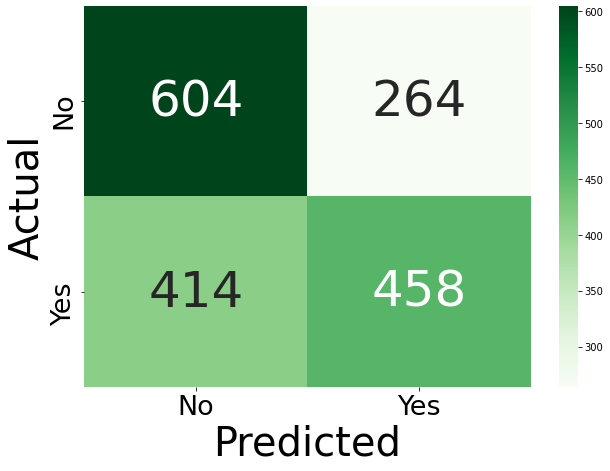

In [19]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

if binary:
    df_cm = pd.DataFrame(array, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
else:
    df_cm = pd.DataFrame(array, index = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]],
                  columns = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]])

plt.figure(figsize = (10,7))

ax = sn.heatmap(df_cm, cmap="Greens", annot=True, annot_kws={"size":50}, fmt='g')
ax.tick_params(axis='both', which='major', labelsize=27)
plt.xlabel('Predicted', fontsize = 40) 
# plt.title("KNN Confusion Matrix", fontsize = 50)
plt.ylabel('Actual', fontsize = 40) 

plt.show()